# 📅 Day 3 — Exploratory Data Analysis (EDA)

![EDA](https://github.com/ValRCS/RTU_Data_Analysis_Visualization_CPD/blob/main/img/icons/EDA.png?raw=true)

## Previously…

In the last sessions, we focused on the **hard but essential work** of data handling:  
- acquiring datasets from different sources,  
- cleaning messy values and duplicates,  
- preparing and transforming data into usable formats.  

That stage often feels technical and sometimes tedious — but it builds the foundation for everything that follows.  

Now, we shift to the part many find most **enjoyable and rewarding**: **exploring the data**.  
Through **visualizations, summaries, and pattern discovery**, we get to uncover the stories hidden inside the dataset. This is the essence of **Exploratory Data Analysis (EDA)**.  


## EDA – Importance and Meaning

Exploratory Data Analysis (EDA) is the process of **getting to know your dataset** before applying advanced models or drawing conclusions.  
It is a critical step in any data analysis workflow (after initial acquisition, cleaning and preparation) because it helps you:

- **Understand structure**: Identify variable types (numerical, categorical, date, text) and the shape of the dataset.  
- **Detect issues**: Spot missing values, inconsistencies, and potential data quality problems.  
- **Summarize key statistics**: Compute central tendencies, spread, correlations, and distributions to build intuition.  
- **Reveal patterns**: Use plots and summaries to see trends, clusters, and group differences.  
- **Identify anomalies**: Highlight unusual points or outliers that may skew results.  
- **Guide decisions**: Inform which cleaning, transformation, or modeling approaches make sense for the dataset.  

Think of EDA as the **detective work** of data analysis. Instead of jumping into advanced models right away, you first explore the dataset to generate hypotheses, validate assumptions, and prepare the ground for deeper analysis.


## Titanic – The Story We Know

![Titanic](https://upload.wikimedia.org/wikipedia/commons/thumb/6/6e/St%C3%B6wer_Titanic.jpg/600px-St%C3%B6wer_Titanic.jpg)

The RMS Titanic was one of the largest and most luxurious ocean liners of its time, celebrated as “unsinkable” when it set sail on its maiden voyage from Southampton to New York in April 1912. Tragically, on the night of April 14th, the ship struck an iceberg in the North Atlantic and sank in the early hours of April 15th. Of the more than 2,200 passengers and crew aboard, over 1,500 lost their lives, making it one of the deadliest peacetime maritime disasters in history.

The Titanic disaster has been studied for decades, not only as a historical event but also as a data source. Passenger records — including age, gender, class, ticket fare, and survival outcome — were compiled from official lists and archives. Today, these records form the basis of the famous **Titanic dataset**, widely used in teaching data analysis and machine learning. It allows us to explore how social and economic factors influenced survival, offering a powerful case study in how data can tell human stories.



## 🛳 The Titanic Dataset

The **Titanic dataset** records information about passengers aboard the RMS Titanic.
It contains a mix of **numerical** and **categorical** variables, as well as **missing data**, **outliers**,
and a **binary target variable** (survival).

We will use Seaborn's built-in Titanic dataset (~891 rows, 15 columns).


## Seaborn – Statistical Data Visualization in Python

[Seaborn](https://seaborn.pydata.org/) is a Python library built on top of **matplotlib** that makes it easier to create clear, attractive, and informative statistical visualizations.  
It comes with **high-level functions** for common plot types such as histograms, scatterplots, boxplots, heatmaps, and regression plots, while handling details like color palettes and axis formatting automatically.  

In this course, we use Seaborn to:
- Quickly explore **distributions** (age, fare)  
- Compare **categories** (survival by sex, class)  
- Visualize **correlations** (heatmaps of numerical features)  
- Highlight **outliers and patterns** in the Titanic dataset  

### Seaborn in Google Colab
Google Colab includes Seaborn **pre-installed**, so you can simply import and use it without setup:

```python
import seaborn as sns
import matplotlib.pyplot as plt


### Loading Libraries


In [1]:
from datetime import datetime
print(f"Today is {datetime.now()}")
import pandas as pd  # we need this for Dataframe and analysis
import seaborn as sns # so seaborn for dataset and visualization
# print seaborn version
print(f"Seaborn version: {sns.__version__}")
import matplotlib.pyplot as plt # the underlaying library for visuals that seaborn


Today is 2025-10-13 15:10:05.945249
Seaborn version: 0.13.2


In [3]:

# Load Titanic dataset from seaborn
titanic = sns.load_dataset("titanic")
# assign alias of df to titanic
df = titanic # now df and titanic point to same dataset THIS IS NOT A COPY
# if you want copy you would use
# df = titanic.copy()
print("Titanic dataset loaded")
# shape
print(titanic.shape)
print(f"Titanic dataset has {titanic.shape[0]} rows and {titanic.shape[1]} columns")
titanic.head()


Titanic dataset loaded
(891, 15)
Titanic dataset has 891 rows and 15 columns


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



### Key Features in the Seaborn Version
- **survived**: Whether the passenger survived (0 = No, 1 = Yes)  
- **pclass**: Passenger class (1st, 2nd, 3rd)  
- **sex**: Male or female  
- **age**: Age of passenger in years  
- **sibsp**: Number of siblings/spouses aboard  
- **parch**: Number of parents/children aboard  
- **fare**: Ticket fare (in British pounds)  
- **embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)  
- **class**: Duplicate categorical version of `pclass`  
- **who**: Man, woman, or child (based on sex and age)  
- **deck**: Cabin deck (many missing)  
- **embark_town**: Full name of embarkation port  
- **alive**: Duplicate categorical version of `survived`  
- **alone**: Whether passenger was alone or not  


## Tidy Data Format

A dataset is considered **tidy** when it follows a consistent structure that makes analysis and visualization easier.  
In tidy data:  

- **Each variable** forms a **column**.  
- **Each observation (measurement)** forms a **row**.  
- **Each type of observational unit** forms a **table**.  

For example, in the Titanic dataset:  
- Variables: `age`, `fare`, `sex`, `class`, `survived` → each has its own column.  
- Observations: each passenger → one row with their age, fare, sex, etc.  
- Dataset: passengers → stored together in a single table.  

### Why tidy data matters
- Functions in **pandas**, **seaborn**, and other Python libraries are designed with tidy data in mind.  
- It makes filtering, grouping, and visualization straightforward.  
- Untidy data (e.g., multiple variables in one column, or one variable spread across multiple columns) often needs to be **reshaped** before analysis.  

In short: **tidy data = one row per measurement, one column per variable**. This consistency is what makes tools like pandas and seaborn so effective.


## 📚 Instruction (3h)

### 1. Descriptive Statistics


#### Measures of Central Tendency: Mean, Median, Mode
We use measures like mean, median, and mode to summarize central tendencies in data.
For example, average passenger age or the most common embarkation port.

#### Refresher of your statistics

* mean - the average value of a numerical variable
* median - the middle value when data is sorted
* mode - the most frequently occurring value in a variable


In [6]:

# Mean, Median, Mode examples
print("Mean age:", titanic['age'].mean())
print("Median age:", titanic['age'].median())
print("Mode embark_town:", titanic['embark_town'].mode()[0])


Mean age: 29.69911764705882
Median age: 28.0
Mode embark_town: Southampton


In [7]:
# we can find out the value counts of embark_town
titanic['embark_town'].value_counts()

,count
embark_town,
Southampton,644
Cherbourg,168
Queenstown,77


## Mean, Median, Mode – When to Use Which?

When analyzing data, the **mean**, **median**, and **mode** are three key measures of central tendency. Each highlights a different aspect of the "typical" value in a dataset, and each has strengths and weaknesses depending on the context.

- **Mean (average)** is best when the data is **continuous, symmetric, and free of extreme outliers**. For example, the average age of Titanic passengers gives a good sense of the general group, but it would be skewed if just a few passengers had extremely high ages recorded incorrectly.  
- **Median (middle value)** is preferred when data is **skewed or contains outliers**, because it is more robust. In the Titanic dataset, the **median fare** is much lower than the mean fare, since a few wealthy first-class passengers paid disproportionately high prices.  
- **Mode (most frequent value)** is especially useful for **categorical or discrete data**. For instance, the mode of `embarked` tells us the most common port of departure, or the mode of `pclass` reveals the most common travel class. For numerical data, mode is less often used unless the data is heavily discrete (e.g., number of siblings).

In practice:
- Use the **mean** for normally distributed data without large outliers.  
- Use the **median** when distributions are skewed or when robustness is needed.  
- Use the **mode** when dealing with categorical or discrete variables where frequency matters.  

Together, these three measures provide a more complete picture of a dataset’s central tendency than any one measure alone.



#### Measures of Spread: Variance, Standard Deviation, Quartiles
Spread measures help us understand variability in the dataset.
Titanic fares vary widely across classes.

#### Refresher of your statistics

* variance - the average of the squared differences from the mean
* standard deviation - the square root of variance, indicating typical deviation from the mean
* quartiles - values that divide the data into four equal parts (Q1, Q2/median, Q3, IQR)

In [10]:

print("Fare variance:", titanic['fare'].var())
print("Fare standard deviation:", titanic['fare'].std())
print("Fare quartiles:")
print(titanic['fare'].describe()[3:8]) # so we take 5th to 7th column here, we start at column 0


Fare variance: 2469.436845743117
Fare standard deviation: 49.693428597180905
Fare quartiles:
min      0.0000
25%      7.9104
50%     14.4542
75%     31.0000
max    512.3292
Name: fare, dtype: float64


In [11]:
# we can get most of these statistics all at once with describe
titanic['fare'].describe()
# in above cell we used [4:7] to get 5th, 6th, and 7th entries, we do not include the last index in our slice that is 8th entry (with index 7) is not included


,fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


## Measures of Spread: Variance, Standard Deviation, Quartiles – When to Use Which?

While measures of central tendency tell us the "typical" value, **measures of spread** describe how much the data varies. They show whether the values are tightly clustered or widely dispersed. The three most common measures are **variance**, **standard deviation**, and **quartiles**.

- **Variance** measures the *average squared deviation* from the mean. It is mathematically important in statistics and probability theory, especially in advanced modeling. However, because it is expressed in squared units (e.g., age²), it is less intuitive to interpret directly.  

- **Standard Deviation (SD)** is the square root of variance and is expressed in the same units as the data. This makes it much easier to interpret. A low SD means the data points are close to the mean, while a high SD indicates more spread. For Titanic, the **standard deviation of fare** shows how widely ticket prices varied among passengers.  

- **Quartiles and Interquartile Range (IQR)** divide the dataset into four equal parts. Q1 is the 25th percentile, Q2 is the median, and Q3 is the 75th percentile. The **IQR (Q3 – Q1)** captures the middle 50% of data, making it very robust against outliers. On Titanic, quartiles are useful for understanding the distribution of fares across different classes, where extreme values (luxury fares) would distort the mean and SD.

### When to Use Which?
- Use **variance** in theoretical or mathematical contexts, especially when working with probability distributions or regression models.  
- Use **standard deviation** when you need a practical, intuitive measure of spread in the same units as your data.  
- Use **quartiles and IQR** when data is skewed or has outliers, as they provide a resistant summary of distribution.  

In practice, analysts often report both **median + IQR** (robust view) and **mean + SD** (classical view) to give a balanced picture of spread.



#### Skewness & Kurtosis
Skewness shows asymmetry in distributions, while kurtosis measures tail heaviness.

#### Refresher of your statistics

* skewness - a measure of asymmetry in a distribution (positive = right tail, negative = left tail)
* kurtosis - a measure of the "tailedness" of a distribution (high kurtosis = heavy tails, low kurtosis = light tails)

More on formulas for these on wiki:
* https://en.wikipedia.org/wiki/Skewness
* https://en.wikipedia.org/wiki/Kurtosis


In [12]:

print("Fare skewness:", titanic['fare'].skew())
print("Fare kurtosis:", titanic['fare'].kurt())


Fare skewness: 4.787316519674893
Fare kurtosis: 33.39814088089868


### Interpretation of Skewness and Kurtosis
- **Skewness**: A skewness value greater than 0 indicates a right-skewed distribution, while a value less than 0 indicates a left-skewed distribution. A value close to 0 suggests a symmetric distribution.
- **Kurtosis**: A kurtosis value greater than 3 indicates a distribution with heavier tails than a normal distribution (leptokurtic), while a value less than 3 indicates lighter tails (platykurtic). A kurtosis of exactly 3 corresponds to a normal distribution (mesokurtic).

In [14]:
# Let's measure skewness and kurtosis for all numerical columns at once
# first we would need to get only numeric columns
numeric_columns = titanic.select_dtypes(include=['number']) # this is not a copy just a view of original dataset
numeric_columns.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [15]:
# now we can measure all numeric columns at once for skew
numeric_columns.skew()

,0
survived,0.478523
pclass,-0.630548
age,0.389108
sibsp,3.695352
parch,2.749117
fare,4.787317


In [16]:
# similarly we can measure kurtosis for all numeric columns
numeric_columns.kurt()

,0
survived,-1.775005
pclass,-1.280015
age,0.178274
sibsp,17.880420
parch,9.778125
fare,33.398141


## Skewness and Kurtosis – When to Use Which?

Beyond central tendency and spread, it is also important to understand the **shape of a distribution**. Two key measures for this are **skewness** and **kurtosis**.

- **Skewness** measures the asymmetry of a distribution:  
  - A **skewness near 0** means the data is roughly symmetric (like a bell curve).  
  - **Positive skew** means the right tail is longer (e.g., Titanic fares: many passengers paid small amounts, but a few paid very high amounts).  
  - **Negative skew** means the left tail is longer (rare, but can occur in age if most passengers are older but a few very young drag the tail down).  
  Skewness is useful when you need to decide whether to apply transformations (like log-transforming highly skewed variables) before modeling.

- **Kurtosis** measures the "tailedness" or concentration of data in the extremes compared to a normal distribution:  
  - **Normal distribution** has kurtosis ≈ 0 (if using Fisher’s definition) or 3 (if using Pearson’s).  
  - **High kurtosis (leptokurtic)** means heavy tails and more outliers (Titanic fares again show this).  
  - **Low kurtosis (platykurtic)** means light tails and fewer outliers than normal.  
  Kurtosis is useful for assessing the presence of outliers and how extreme values may influence analysis.

### When to Use Which?
- Use **skewness** when you want to check for asymmetry and decide on transformations to make data more normal.  
- Use **kurtosis** when evaluating whether outliers are likely and how “peaked” or “flat” your distribution is compared to normal.  
- Both are most useful in **EDA before modeling**, especially when considering regression, correlation, or machine learning methods that assume normality.  

In practice, **skewness highlights direction of imbalance**, while **kurtosis highlights the weight of the tails**. Together, they help you understand if your data matches the assumptions of common statistical techniques or if adjustments are needed.


### Descriptive Statistics versus Visualizations

- Descriptive statistics provide numerical summaries of data, while visualizations offer graphical representations.
- Statistics give precise measures (e.g., mean, median), while visualizations reveal patterns, trends, and outliers.
- Both are complementary: statistics quantify, while visualizations illustrate.



## Anscombe’s Quartet – Why Visualization Matters

In 1973, statistician Francis Anscombe created four small datasets, now known as **Anscombe’s Quartet**, to highlight the importance of visualization in data analysis.  

![Quarter](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/960px-Anscombe%27s_quartet_3.svg.png)

Each dataset has (almost) identical **summary statistics**:  
- Same mean of x and y  
- Same variance of x and y  
- Same correlation between x and y  
- Same linear regression line  

Yet, when plotted, they look completely different:  
1. A nearly perfect linear relationship  
2. A clear non-linear curve  
3. A dataset where one outlier changes interpretation  
4. A dataset with a single influential point that drives the regression  

👉 The lesson: **statistics alone can be misleading**. Without visualization, we may miss underlying patterns, clusters, or anomalies.  

This concept is often extended with the **Datasaurus Dozen**, a modern set of datasets shaped like a dinosaur 🦖, star, or circle, all sharing very similar summary statistics but dramatically different shapes when plotted.  

**Key takeaway:** Always visualize your data during EDA — it may tell a very different story than the numbers suggest.


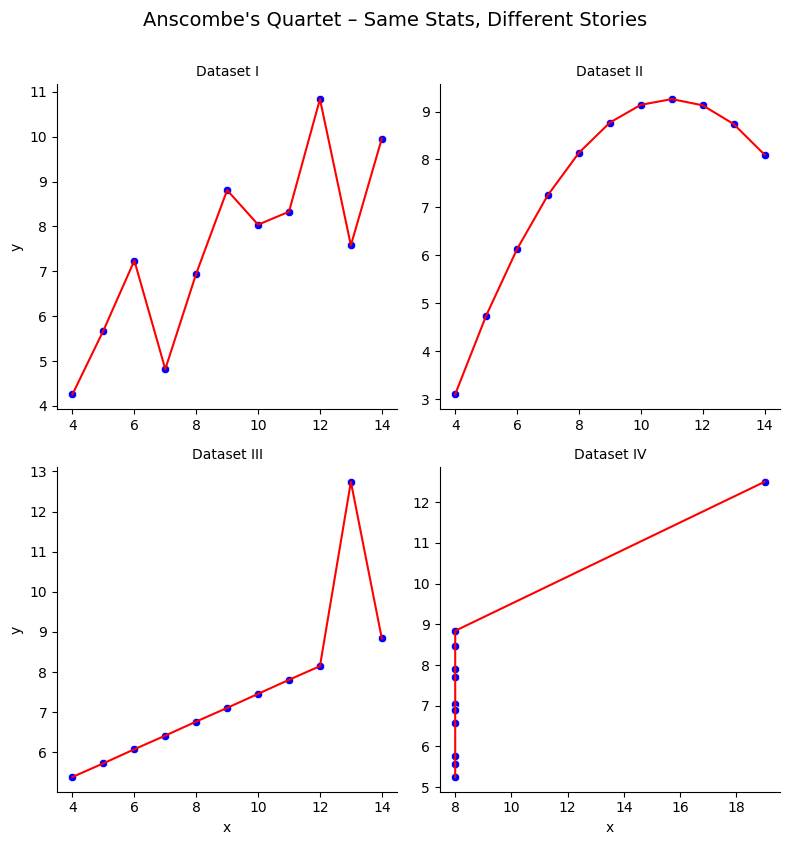

In [17]:
# Load Anscombe's Quartet dataset (built into Seaborn)
anscombe = sns.load_dataset("anscombe")

# Create FacetGrid: one plot per dataset (I, II, III, IV)
g = sns.FacetGrid(anscombe, col="dataset", col_wrap=2, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x="x", y="y", color="blue")
g.map_dataframe(sns.lineplot, x="x", y="y", color="red", estimator=None)  # regression line (for demo)

# Add titles
g.set_titles("Dataset {col_name}")
g.set_axis_labels("x", "y")
plt.suptitle("Anscombe's Quartet – Same Stats, Different Stories", y=1.05, fontsize=14)
plt.show()

In [18]:
# let's see what did we get
type(anscombe)

pandas.core.frame.DataFrame

In [19]:
# so this means we can just show it all
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


## The Datasaurus Dozen – Same Stats, Wildly Different Shapes

Building on the lesson of Anscombe’s Quartet, the **Datasaurus Dozen** is a modern collection of datasets created by Justin Matejka and George Fitzmaurice (2017). Each dataset has nearly identical **summary statistics** (same mean, standard deviation, and correlation), yet the points form dramatically different shapes when plotted.

Some examples include:  
- 🦖 A dinosaur (the famous “Datasaurus”)  
- ⭐ A star  
- ⚽ A circle or bullseye  
- 📈 Random scatter that still shares the same stats  

### Why it matters
- **Summary statistics can hide important details**.  
- **Visualization reveals structure** that numbers alone cannot capture.  
- Just like with Titanic data, relying only on averages and variances may cause us to miss crucial patterns.  

The Datasaurus Dozen reminds us that **EDA is not just about numbers — it’s about seeing the data.**  

👉 Key takeaway: Always plot your data. The shape, clusters, and outliers tell a story that summary measures cannot.


### 2. Distribution Exploration

#### Histograms

Histograms show the distribution of numerical variables.
For example, the age distribution of Titanic passengers.

In [20]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [21]:
# how many missing ages we have in our age column
titanic[['age', 'fare']].isnull().sum() # we could have used also isna().sum()

,0
age,177
fare,0


In [22]:
# let's see if we have really cheap fares
cheap_passangers = titanic[titanic['fare'] < 1]
cheap_passangers.shape

(15, 15)

In [23]:
cheap_passangers

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
179,0,3,male,36.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
263,0,1,male,40.0,0,0,0.0,S,First,man,True,B,Southampton,no,True
271,1,3,male,25.0,0,0,0.0,S,Third,man,True,NaN,Southampton,yes,True
277,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
302,0,3,male,19.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
413,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
466,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
481,0,2,male,NaN,0,0,0.0,S,Second,man,True,NaN,Southampton,no,True
597,0,3,male,49.0,0,0,0.0,S,Third,man,True,NaN,Southampton,no,True
633,0,1,male,NaN,0,0,0.0,S,First,man,True,NaN,Southampton,no,True


In [24]:
titanic['age'].isnull()[:10]

,age
0,False
1,False
2,False
3,False
4,False
5,True
6,False
7,False
8,False
9,False


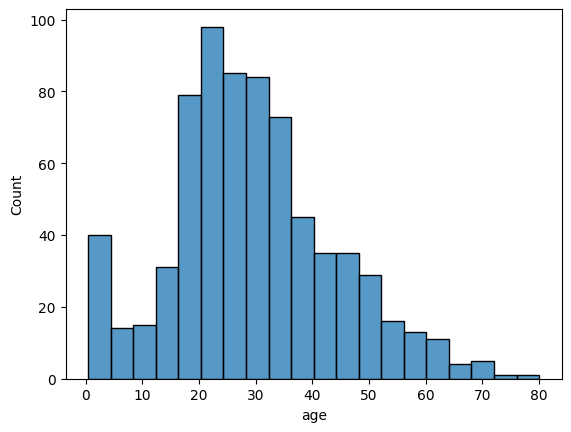

In [25]:
# so for plotting we often need to drop the missing values
# we have 177 passengers in this dataset without known age
# so we temporary drop them when plotting
sns.histplot(titanic['age'].dropna(), bins=20, kde=False);

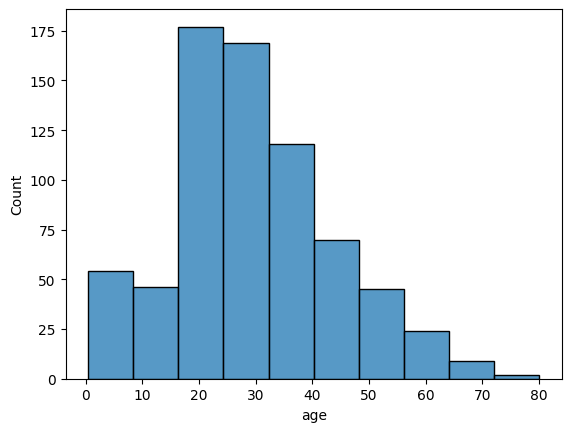

In [26]:
# let's try different bin size
sns.histplot(titanic['age'].dropna(), bins=10, kde=False);

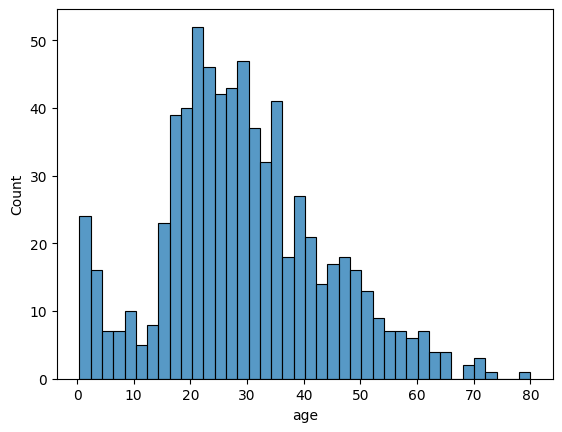

In [27]:
# how about 40 bins?
sns.histplot(titanic['age'].dropna(), bins=40, kde=False);

#### Density Plots

Density plots provide a smoothed estimate of the distribution.
They help visualize the shape of the distribution without binning artifacts.

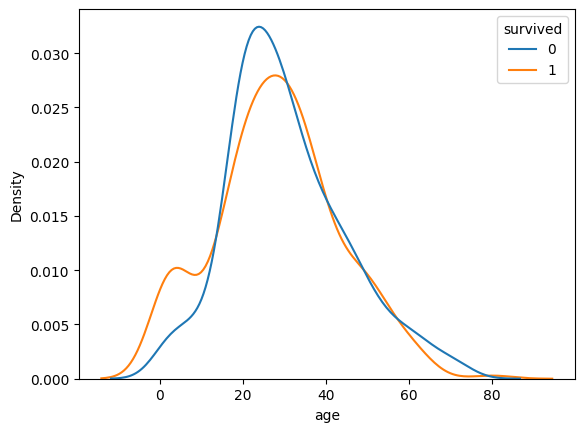

In [28]:
sns.kdeplot(data=titanic, x='age', hue='survived', common_norm=False); # here we see seaborn offering to color by another column

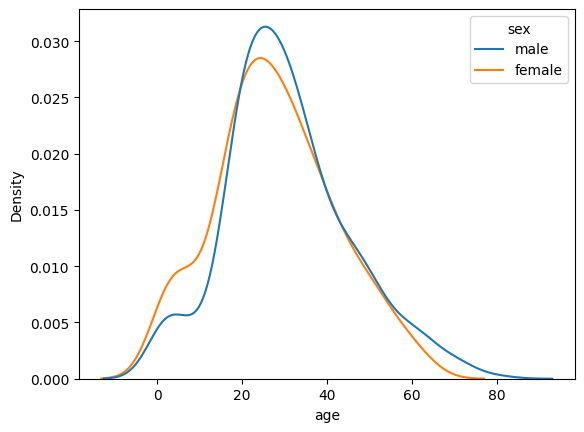

In [29]:
# how abour men versus women by age KDE ?
sns.kdeplot(data=titanic, x='age', hue='sex', common_norm=False);

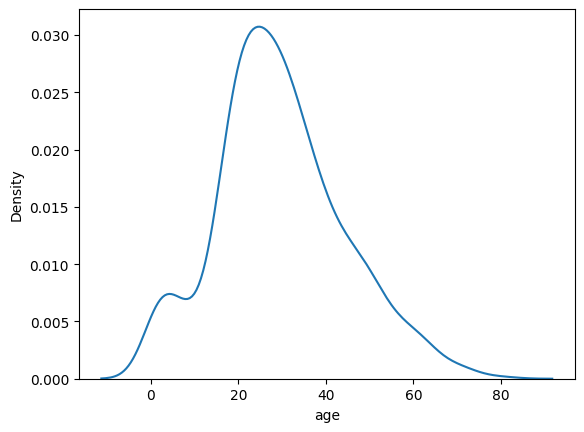

In [30]:
# how about a simple kde without hue
sns.kdeplot(data=titanic, x='age'); # so for x we can choose ANY numeric column

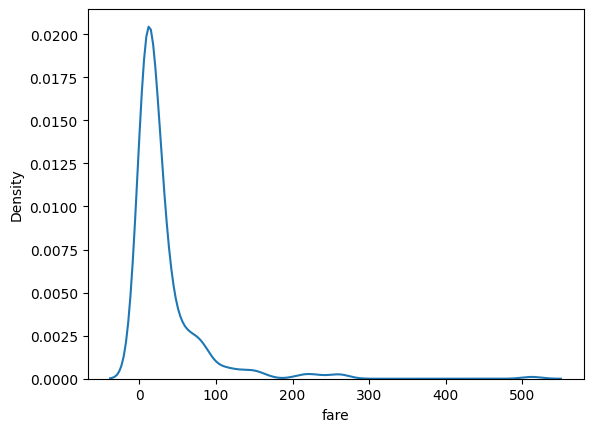

In [32]:
# let's plot KDE of fare column
sns.kdeplot(data=titanic, x='fare');

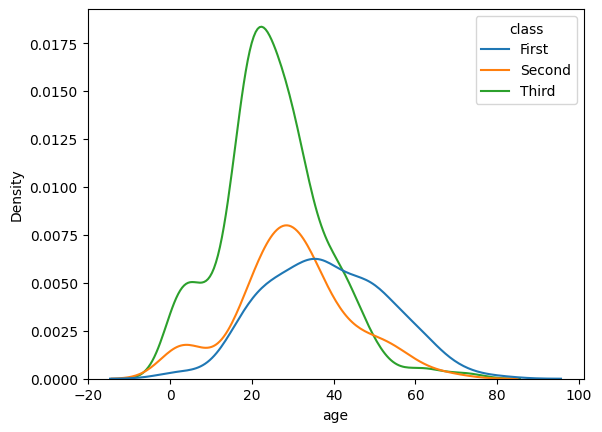

In [33]:
# let's plot kde for age with hue for pclass
sns.kdeplot(data=titanic, x='age', hue='class');

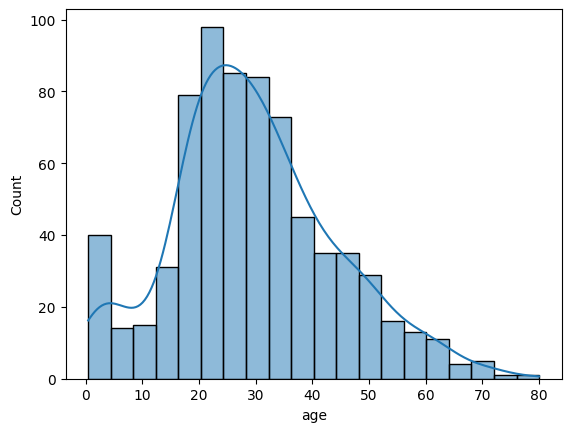

In [34]:
# let's plot age histogram together with KDE plot
sns.histplot(titanic['age'].dropna(), kde=True); # so by not supplying bins we default to auto bins meaning seaborn algorithm will pick the number of bins for us

<Axes: xlabel='fare', ylabel='Count'>

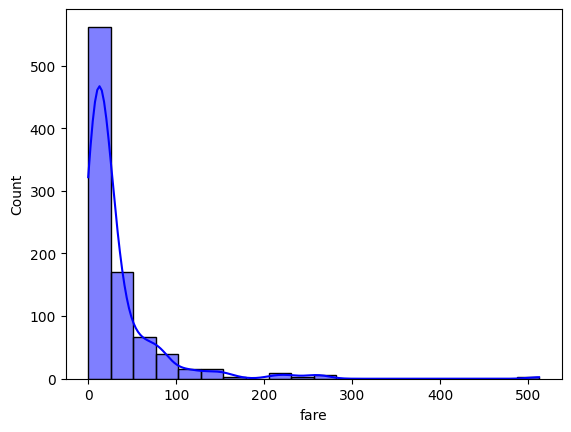

In [35]:
# so let's plot fare histogram including kde, use blue for histogram and red for kde
sns.histplot(titanic['fare'].dropna(), bins=20, kde=True, color='blue')
# we could have plotted two plots in same cell but here our output values are not automatically scaled kde vs histogram counts
# sns.histplot(titanic['fare'].dropna(), bins=20, kde=False, color='blue')
# sns.kdeplot(titanic['fare'].dropna(), color='red');


#### Boxplots

Boxplots summarize distributions and highlight outliers.
They show median, quartiles, and potential outliers in fare by passenger class.

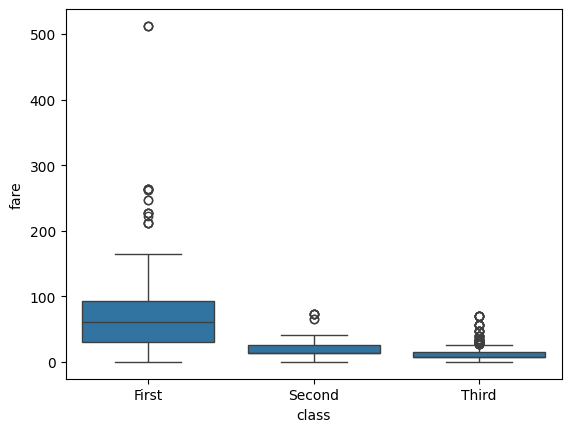

In [36]:
sns.boxplot(data=titanic, x='class', y='fare');

In [37]:
# let's print median, quartiles for fare by passenger class
titanic.groupby('class')['fare'].describe()

/tmp/ipython-input-471934291.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby('class')['fare'].describe()


,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
First,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
Second,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
Third,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [38]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [39]:
# let's group by class and embark_town and describe fares
titanic.groupby(['class', 'embark_town'])['fare'].describe()

/tmp/ipython-input-2912268945.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['class', 'embark_town'])['fare'].describe()


count        mean        std      min      25%      50%  \
class  embark_town                                                            
First  Cherbourg     85.0  104.718529  99.093935  26.5500  49.5000  78.2667   
       Queenstown     2.0   90.000000   0.000000  90.0000  90.0000  90.0000   
       Southampton  127.0   70.364862  58.811278   0.0000  29.2500  52.0000   
Second Cherbourg     17.0   25.358335  11.345067  12.0000  13.8625  24.0000   
       Queenstown     3.0   12.350000   0.000000  12.3500  12.3500  12.3500   
       Southampton  164.0   20.327439  13.630741   0.0000  13.0000  13.5000   
Third  Cherbourg     66.0   11.214083   4.871528   4.0125   7.2292   7.8958   
       Queenstown    72.0   11.183393   6.721677   6.7500   7.7500   7.7500   
       Southampton  353.0   14.644083  13.276609   0.0000   7.8542   8.0500   

                           75%       max  
class  embark_town                        
First  Cherbourg    110.883300  512.3292  
       Queenstown    90.000000   90.0000  
       Southampton   83.475000  263.0000  
Second Cherbourg     37.004200   41.5792  
       Queenstown    12.350000   12.3500  
       Southampton   26.000000   73.5000  
Third  Cherbourg     14.458300   22.3583  
       Queenstown    10.218725   29.1250  
       Southampton   16.100000   69.5500

In [41]:
# let's group by passenger class, embark town and then sex and then describe fare
titanic.groupby(['class', 'embark_town', 'sex'])['fare'].describe()

/tmp/ipython-input-531607523.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  titanic.groupby(['class', 'embark_town', 'sex'])['fare'].describe()


count        mean         std      min        25%  \
class  embark_town sex                                                         
First  Cherbourg   female   43.0  115.640309   88.571645  27.7208  69.300000   
                   male     42.0   93.536707  108.760095  26.5500  30.695800   
       Queenstown  female    1.0   90.000000         NaN  90.0000  90.000000   
                   male      1.0   90.000000         NaN  90.0000  90.000000   
       Southampton female   48.0   99.026910   61.094407  25.9292  53.100000   
                   male     79.0   52.949947   50.253732   0.0000  26.550000   
Second Cherbourg   female    7.0   25.268457   12.875764  12.0000  13.825000   
                   male     10.0   25.421250   10.875870  12.8750  15.046850   
       Queenstown  female    2.0   12.350000    0.000000  12.3500  12.350000   
                   male      1.0   12.350000         NaN  12.3500  12.350000   
       Southampton female   67.0   21.912687   10.759887  10.5000  13.000000   
                   male     97.0   19.232474   15.261299   0.0000  11.500000   
Third  Cherbourg   female   23.0   14.694926    4.471080   7.2250  13.935450   
                   male     43.0    9.352237    4.009042   4.0125   7.225000   
       Queenstown  female   33.0   10.307833    5.567107   6.7500   7.750000   
                   male     39.0   11.924251    7.555717   6.7500   7.750000   
       Southampton female   88.0   18.670077   13.720347   7.2500   8.509375   
                   male    265.0   13.307149   12.875992   0.0000   7.795800   

                               50%         75%       max  
class  embark_town sex                                    
First  Cherbourg   female  83.1583  134.500000  512.3292  
                   male    61.6792  102.588550  512.3292  
       Queenstown  female  90.0000   90.000000   90.0000  
                   male    90.0000   90.000000   90.0000  
       Southampton female  79.6500  139.612475  263.0000  
                   male    35.0000   54.500000  263.0000  
Second Cherbourg   female  24.0000   35.825000   41.5792  
                   male    25.8604   35.270850   41.5792  
       Queenstown  female  12.3500   12.350000   12.3500  
                   male    12.3500   12.350000   12.3500  
       Southampton female  23.0000   26.000000   65.0000  
                   male    13.0000   26.000000   73.5000  
Third  Cherbourg   female  14.4583   17.500000   22.3583  
                   male     7.2292    8.687500   21.6792  
       Queenstown  female   7.7500    8.029200   29.1250  
                   male     7.7500   15.500000   29.1250  
       Southampton female  14.4500   24.479175   69.5500  
                   male     8.0500    9.845800   69.5500

In [42]:
titanic['class'].value_counts()

,count
class,
Third,491
First,216
Second,184


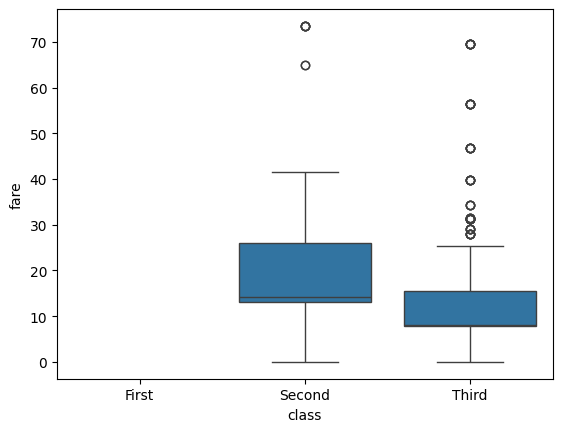

In [43]:
# so let's plot titanic fares in boxplot but only second and third class
sns.boxplot(data=titanic[titanic['class'].isin(['Second', 'Third'])], x='class', y='fare');

### 3. Outlier Detection

#### Boxplots & Scatterplots

Boxplots and scatterplots help identify outliers in numerical data.
For instance, unusually high fares paid by some passengers.

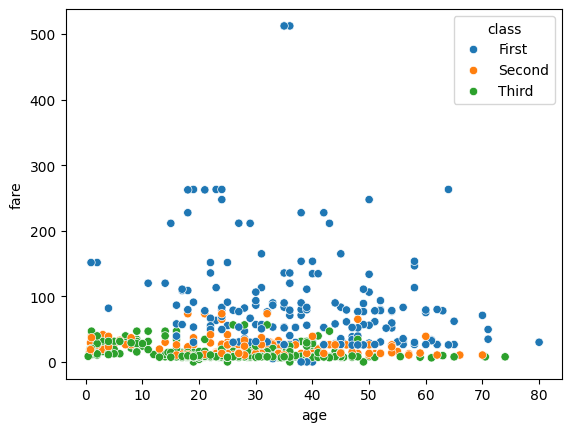

In [44]:
sns.scatterplot(data=titanic, x='age', y='fare', hue='class');

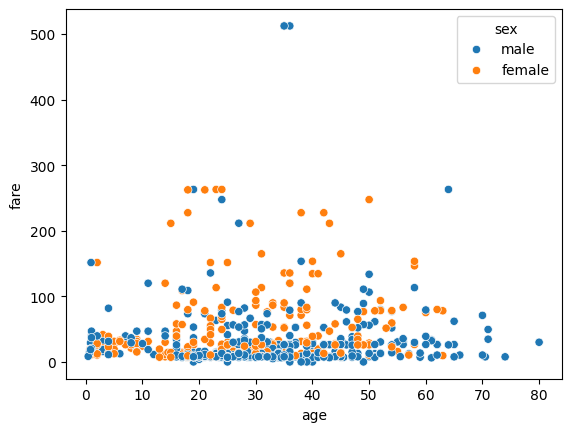

In [ ]:
# so let's scatter plot fare versu age and hue would be sex
sns.scatterplot(data=titanic, x='age', y='fare', hue='sex');

In [ ]:
# so let's see value counts by sex for fares over 100
titanic[titanic['fare'] > 100]['sex'].value_counts()

,count
sex,
female,34
male,19


In [ ]:
# so how about value counts of fares over 100 only for ages between 18 and 30
titanic[(titanic['fare'] > 100) & (titanic['age'] >= 18) & (titanic['age'] <= 30)]['sex'].value_counts()
# above example shows how we can use multiple filters

,count
sex,
female,10
male,5


## Filtering and creating a copy of data

In [ ]:
# i can save filtered data for separate analysis
# rich_young_adults = titanic[(titanic['fare'] > 100) & (titanic['age'] > 18) & (titanic['age'] < 30)] # this command would give you slice (not full copy of your date)
# if you know you do not have much data and you want to change it maybe then copy() at end would create your own data that you can modify without changing original
rich_young_adults = titanic[(titanic['fare'] > 100) & (titanic['age'] >= 18) & (titanic['age'] <= 30)].copy() # so in pandas we use .copy() to create explicit copy of some dataframe
rich_young_adults.sort_values(by="age")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
311,1,1,female,18.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False
505,0,1,male,18.0,1,0,108.9000,C,First,man,True,C,Cherbourg,no,False
700,1,1,female,18.0,1,0,227.5250,C,First,woman,False,C,Cherbourg,yes,False
27,0,1,male,19.0,3,2,263.0000,S,First,man,True,C,Southampton,no,False
742,1,1,female,21.0,2,2,262.3750,C,First,woman,False,B,Cherbourg,yes,False
708,1,1,female,22.0,0,0,151.5500,S,First,woman,False,NaN,Southampton,yes,True
373,0,1,male,22.0,0,0,135.6333,C,First,man,True,NaN,Cherbourg,no,True
88,1,1,female,23.0,3,2,263.0000,S,First,woman,False,C,Southampton,yes,False
393,1,1,female,23.0,1,0,113.2750,C,First,woman,False,D,Cherbourg,yes,False
118,0,1,male,24.0,0,1,247.5208,C,First,man,True,B,Cherbourg,no,False


In [ ]:
# let's get count of survivors from our young rich adults
rich_young_adults['survived'].value_counts()

,count
survived,
1,9
0,6


#### IQR Method

The Interquartile Range (IQR) method identifies outliers as points below Q1 - 1.5*IQR or above Q3 + 1.5*IQR.    

Definition of IQR: IQR = Q3 - Q1, where Q1 is the first quartile (25th percentile) and Q3 is the third quartile (75th percentile).
Wiki reference: https://en.wikipedia.org/wiki/Interquartile_range

![IQR](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/500px-Boxplot_vs_PDF.svg.png)

In [ ]:

Q1 = titanic['fare'].quantile(0.25)
Q3 = titanic['fare'].quantile(0.75)
print(f"Q1 {Q1}")
print(f"Q3 {Q3}")
IQR = Q3 - Q1
print(f"IQR is {IQR} thus 1.5 IQR is {1.5*IQR}")

outliers = titanic[(titanic['fare'] < Q1 - 1.5*IQR) | (titanic['fare'] > Q3 + 1.5*IQR)] # note | in filter means OR
print("Outliers count:", len(outliers))


Q1 7.9104
Q3 31.0
IQR is 23.0896 thus 1.5 IQR is 34.6344
Outliers count: 116


In [ ]:
# so our outliers here would be all on the right side since we have no negatives
right_side_fare_outlier_limit = Q3 + 1.5*IQR
print(f"The right side limit for outliers by IQR method is: {right_side_fare_outlier_limit}")
# so in this case since we have nothing on left side (negative prices do not exist)
# we expect that right side filter would give us same results
titanic[titanic['fare'] > right_side_fare_outlier_limit].shape


The right side limit for outliers by IQR method is: 65.6344


(116, 15)

In [ ]:
# so all outliers should be the expensive tickets, because we do no have any negative fares
# negative fares would mean - someone is paying you to take a trip...
# let's see the range of outliers
outliers['fare'].describe()

,fare
count,116.000000
mean,128.291629
std,84.636908
min,66.600000
25%,78.189600
50%,90.000000
75%,147.778100
max,512.329200


In [ ]:
## Could check how did these outliers do on survival

### 4. Correlation Analysis

Correlation measures the strength and direction of relationships between numerical variables.
#### Correlation Matrix
A correlation matrix shows pairwise correlations between numerical variables.

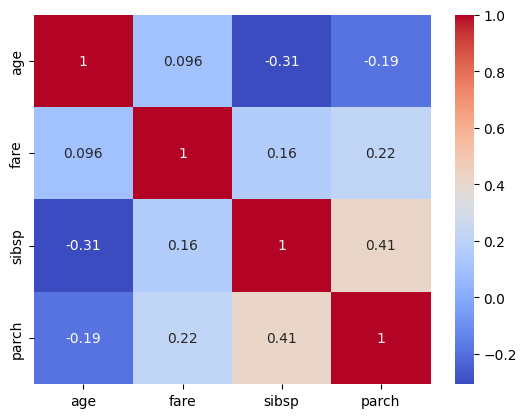

In [ ]:

corr = titanic[['age','fare','sibsp','parch']].corr() # note the double square [[]] notation - essentially I am passing a list of columns
sns.heatmap(corr, annot=True, cmap='coolwarm'); # we can change cmap to other color schemes


### 5. Grouping & Aggregation

Grouping and aggregation summarize data by categories.

The `groupby` function in Pandas allows you to group data by one or more categorical variables and then apply aggregation functions (like mean, sum, count) to summarize the data within each group.

#### Similarity to SQL's GROUP BY
Pandas' `groupby` function is similar to SQL's `GROUP BY` clause, allowing aggregation of data based on categorical variables.

## Understanding `groupby` in Pandas

The `groupby` operation in **pandas** is one of the most powerful tools for summarizing and analyzing data.  
It works in three main steps, often described as **split–apply–combine**:

1. **Split** – The data is divided into groups based on one or more keys (columns).  
   Example: splitting Titanic passengers by `sex` or `class`.  

2. **Apply** – A function (such as `mean`, `sum`, `count`, `median`, `min`, `max`) is applied independently to each group.  
   Example: calculating the average fare for each class.  

3. **Combine** – The results of these operations are combined into a new DataFrame or Series.  
   Example: a summary table showing mean fares per class.

![https://www.w3resource.com/w3r_images/pandas-groupby-split-apply-combine.svg](https://www.w3resource.com/w3r_images/pandas-groupby-split-apply-combine.svg)

Src: https://www.w3resource.com/w3r_images/pandas-groupby-split-apply-combine.svg

### Why is `groupby` useful?
- It allows us to quickly compare groups (e.g., survival rates by sex).  
- It simplifies working with **aggregations across categories**.  
- It helps uncover patterns hidden in subsets of the data.  

### Example (Titanic dataset)
```python
# Average survival rate by sex
titanic.groupby("sex")["survived"].mean()

# Average fare and age by class
titanic.groupby("class")[["fare", "age"]].mean()


In [ ]:

# Survival rates by sex
display(titanic.groupby('sex')['survived'].mean())
# display is for Pandas Dataframe objects (also Series)

# Multiple statistics on fares by class
titanic.groupby('class', observed=False)['fare'].agg(['mean','median','count'])


,survived
sex,
female,0.742038
male,0.188908


,mean,median,count
class,,,
First,84.154687,60.2875,216
Second,20.662183,14.2500,184
Third,13.675550,8.0500,491


In [ ]:
# I can add also multiple grouping columns so lets use class and sex for groupby then agg
titanic.groupby(['class', 'sex'], observed=False)['fare'].agg(['mean','median','count'])

mean    median  count
class  sex                                
First  female  106.125798  82.66455     94
       male     67.226127  41.26250    122
Second female   21.970121  22.00000     76
       male     19.741782  13.00000    108
Third  female   16.118810  12.47500    144
       male     12.661633   7.92500    347

In [ ]:
# we can save above table to excel
titanic.groupby(['class', 'sex'], observed=False)['fare'].agg(['mean','median','count']).to_excel('grouped_by_class_and_sex.xlsx')


In [ ]:
# if I am on google colab I can download the xlsx file
from google.colab import files
files.download('grouped_by_class_and_sex.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# let's gropy by class sex and alone columns and apply mean median count
titanic.groupby(['class', 'sex', 'alone'], observed=False)['fare'].agg(['mean','median','count'])

mean    median  count
class  sex    alone                             
First  female False  106.219445  82.66455     60
              True   105.960538  81.57915     34
       male   False  103.488123  79.20000     47
              True    44.501943  30.00000     75
Second female False   27.916761  26.00000     44
              True    13.793491  13.00000     32
       male   False   30.850811  26.12500     36
              True    14.187268  13.00000     72
Third  female False   21.750298  18.00000     84
              True     8.234727   7.77500     60
       male   False   22.693076  18.00000     83
              True     9.507808   7.89580    264

In [ ]:
# # let's group by class sex and alone columns  and then calculate survived percentage
titanic.groupby(['class', 'sex', 'alone'], observed=False)['survived'].agg(['mean','count'])

mean  count
class  sex    alone                 
First  female False  0.966667     60
              True   0.970588     34
       male   False  0.425532     47
              True   0.333333     75
Second female False  0.931818     44
              True   0.906250     32
       male   False  0.277778     36
              True   0.097222     72
Third  female False  0.416667     84
              True   0.616667     60
       male   False  0.180723     83
              True   0.121212    264

## Pandas `pivot` – Reshaping Data for Better Insights

The `pivot` function in **pandas** reshapes data by turning unique values from one column into **new columns**, while using other columns for the index and the cell values.  
This is especially useful for creating **summary tables** that are easier to read and interpret.

### How it works
- **index** → the column to use as row labels.  
- **columns** → the column whose unique values become new column headers.  
- **values** → the column that fills the table cells.  

### Example with Titanic
Suppose we want to compare **average fares** by **class** and **sex**:

```python
pivot_table = titanic.pivot(
    index="class",
    columns="sex",
    values="fare"
)
print(pivot_table)


In [ ]:
# Suppose we want to compare average fares by class and sex:
# We use pivot_table instead of pivot because there are multiple entries for each class and sex combination
pivot_table = pd.pivot_table(titanic, values='fare', index='class', columns='sex', aggfunc='mean')

# shape
print(f"Shape of pivot table: {pivot_table.shape}")
#
pivot_table.head()

Shape of pivot table: (3, 2)


/tmp/ipython-input-3269833511.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(titanic, values='fare', index='class', columns='sex', aggfunc='mean')


sex,female,male
class,,
First,106.125798,67.226127
Second,21.970121,19.741782
Third,16.118810,12.661633


### Pivot Tables

Pivot tables provide a multi-dimensional summary of data, allowing you to aggregate and analyze data across multiple categorical variables simultaneously.

### Crosstab in Pandas

Crosstab is a specific type of pivot table that computes a simple cross-tabulation of two (or more) factors. It is often used to analyze the relationship between categorical variables.

#### Pandas `crosstab` – Quick Frequency Tables

The `crosstab` function in **pandas** is a fast way to compute **frequency tables** (counts or proportions) across two or more categorical variables.  
It is very similar to a pivot table, but it is **designed specifically for counting and cross-tabulation**.

#### How it works
- By default, `crosstab` counts the number of occurrences for each combination of categories.  
- You can also normalize (to show proportions) or apply other aggregation functions.

#### Example with Titanic
Count how many passengers survived by sex:

```python
pd.crosstab(titanic['sex'], titanic['survived'])


Below we analyze survival rates by passenger class and gender.



In [ ]:

pd.crosstab(titanic['sex'], titanic['class'], values=titanic['survived'], aggfunc='mean')
# again by addint to_excel to generated DataFrame we could save it


class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
# so if I want the above crosstab but want percentage then multiply end table by 100
pd.crosstab(titanic['sex'], titanic['class'], values=titanic['survived'], aggfunc='mean') * 100

class,First,Second,Third
sex,,,
female,96.808511,92.105263,50.000000
male,36.885246,15.740741,13.544669


### 6. Missing Data Analysis

#### Identifying Missing Data

We identify missing data using functions like `isnull()` and `sum()` in Pandas.



In [ ]:
titanic.isnull().sum() # isnull is alias to isna

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


### 7. Chi-Squared Test for Categorical Variables

Chi-squared test assesses associations between categorical variables.

#### Chi-Squared Test Overview

- The Chi-squared test evaluates whether there is a significant association between two categorical variables.
- It compares observed frequencies in each category to the frequencies expected if there were no association.


#### Pandas `crosstab` and `chi2_contingency`

- We can use `pandas.crosstab` to create a contingency table of observed frequencies.
- The `scipy.stats.chi2_contingency` function performs the Chi-squared test on the contingency table.

#### Interpreting Chi-Squared Results

- The test returns a Chi-squared statistic, p-value, degrees of freedom, and expected frequencies.
- A low p-value (typically < 0.05) indicates a significant association between the variables.
#### Example

```python
import pandas as pd
from scipy.stats import chi2_contingency
# Create a contingency table
contingency_table = pd.crosstab(df['embarked'], df['survived'])
# Perform Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared: {chi2}, p-value: {p}")
# Interpret results
if p < 0.05:
    print("Significant association between embarked port and survival.")
else:
    print("No significant association between embarked port and survival.")
```

More on Chi-squared test: https://en.wikipedia.org/wiki/Chi-squared_test

In [ ]:
df = titanic # simply create an alias (NOT FULL COPY)
# for full copy I would use df = titanic.copy()
import pandas as pd # no real need since we already imported
from scipy.stats import chi2_contingency # scipy is scientific python library
# Create a contingency table
contingency_table = pd.crosstab(df['embarked'], df['survived'])
contingency_table

survived,0,1
embarked,,
C,75,93
Q,47,30
S,427,217


In [ ]:

# Perform Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared: {chi2}, p-value: {p}")
# Interpret results
if p < 0.05:
    print("Significant association between embarked port and survival.")
else:
    print("No significant association between embarked port and survival.")

Chi-squared: 26.48914983923762, p-value: 1.769922284120912e-06
Significant association between embarked port and survival.


In [ ]:
# so let's see if there is association between sex and survived
contingency_table = pd.crosstab(df['sex'], df['survived'])
# Perform Chi-squared test
contingency_table

survived,0,1
sex,,
female,81,233
male,468,109


In [ ]:
# so let's see if there is association between sex and survived
contingency_table = pd.crosstab(df['sex'], df['survived'])
# Perform Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared: {chi2}, p-value: {p}")
# Interpret results
if p < 0.05:
    print("Significant association between sex and survival.")
else:
    print("No significant association between sex and survival.")

Chi-squared: 260.71702016732104, p-value: 1.1973570627755645e-58
Significant association between sex and survival.


## Overview of our EDA

* So gather basics stats (simplest via describe)

In [ ]:
# let's just use describe on ALL columns
titanic.describe(include='all') # so will use basic stats on numerical and object columns

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# so let's divice top alive with total number
(891-549) / 891 # which matches our survived

0.3838383838383838

## Quick plot of all numerics versus each other

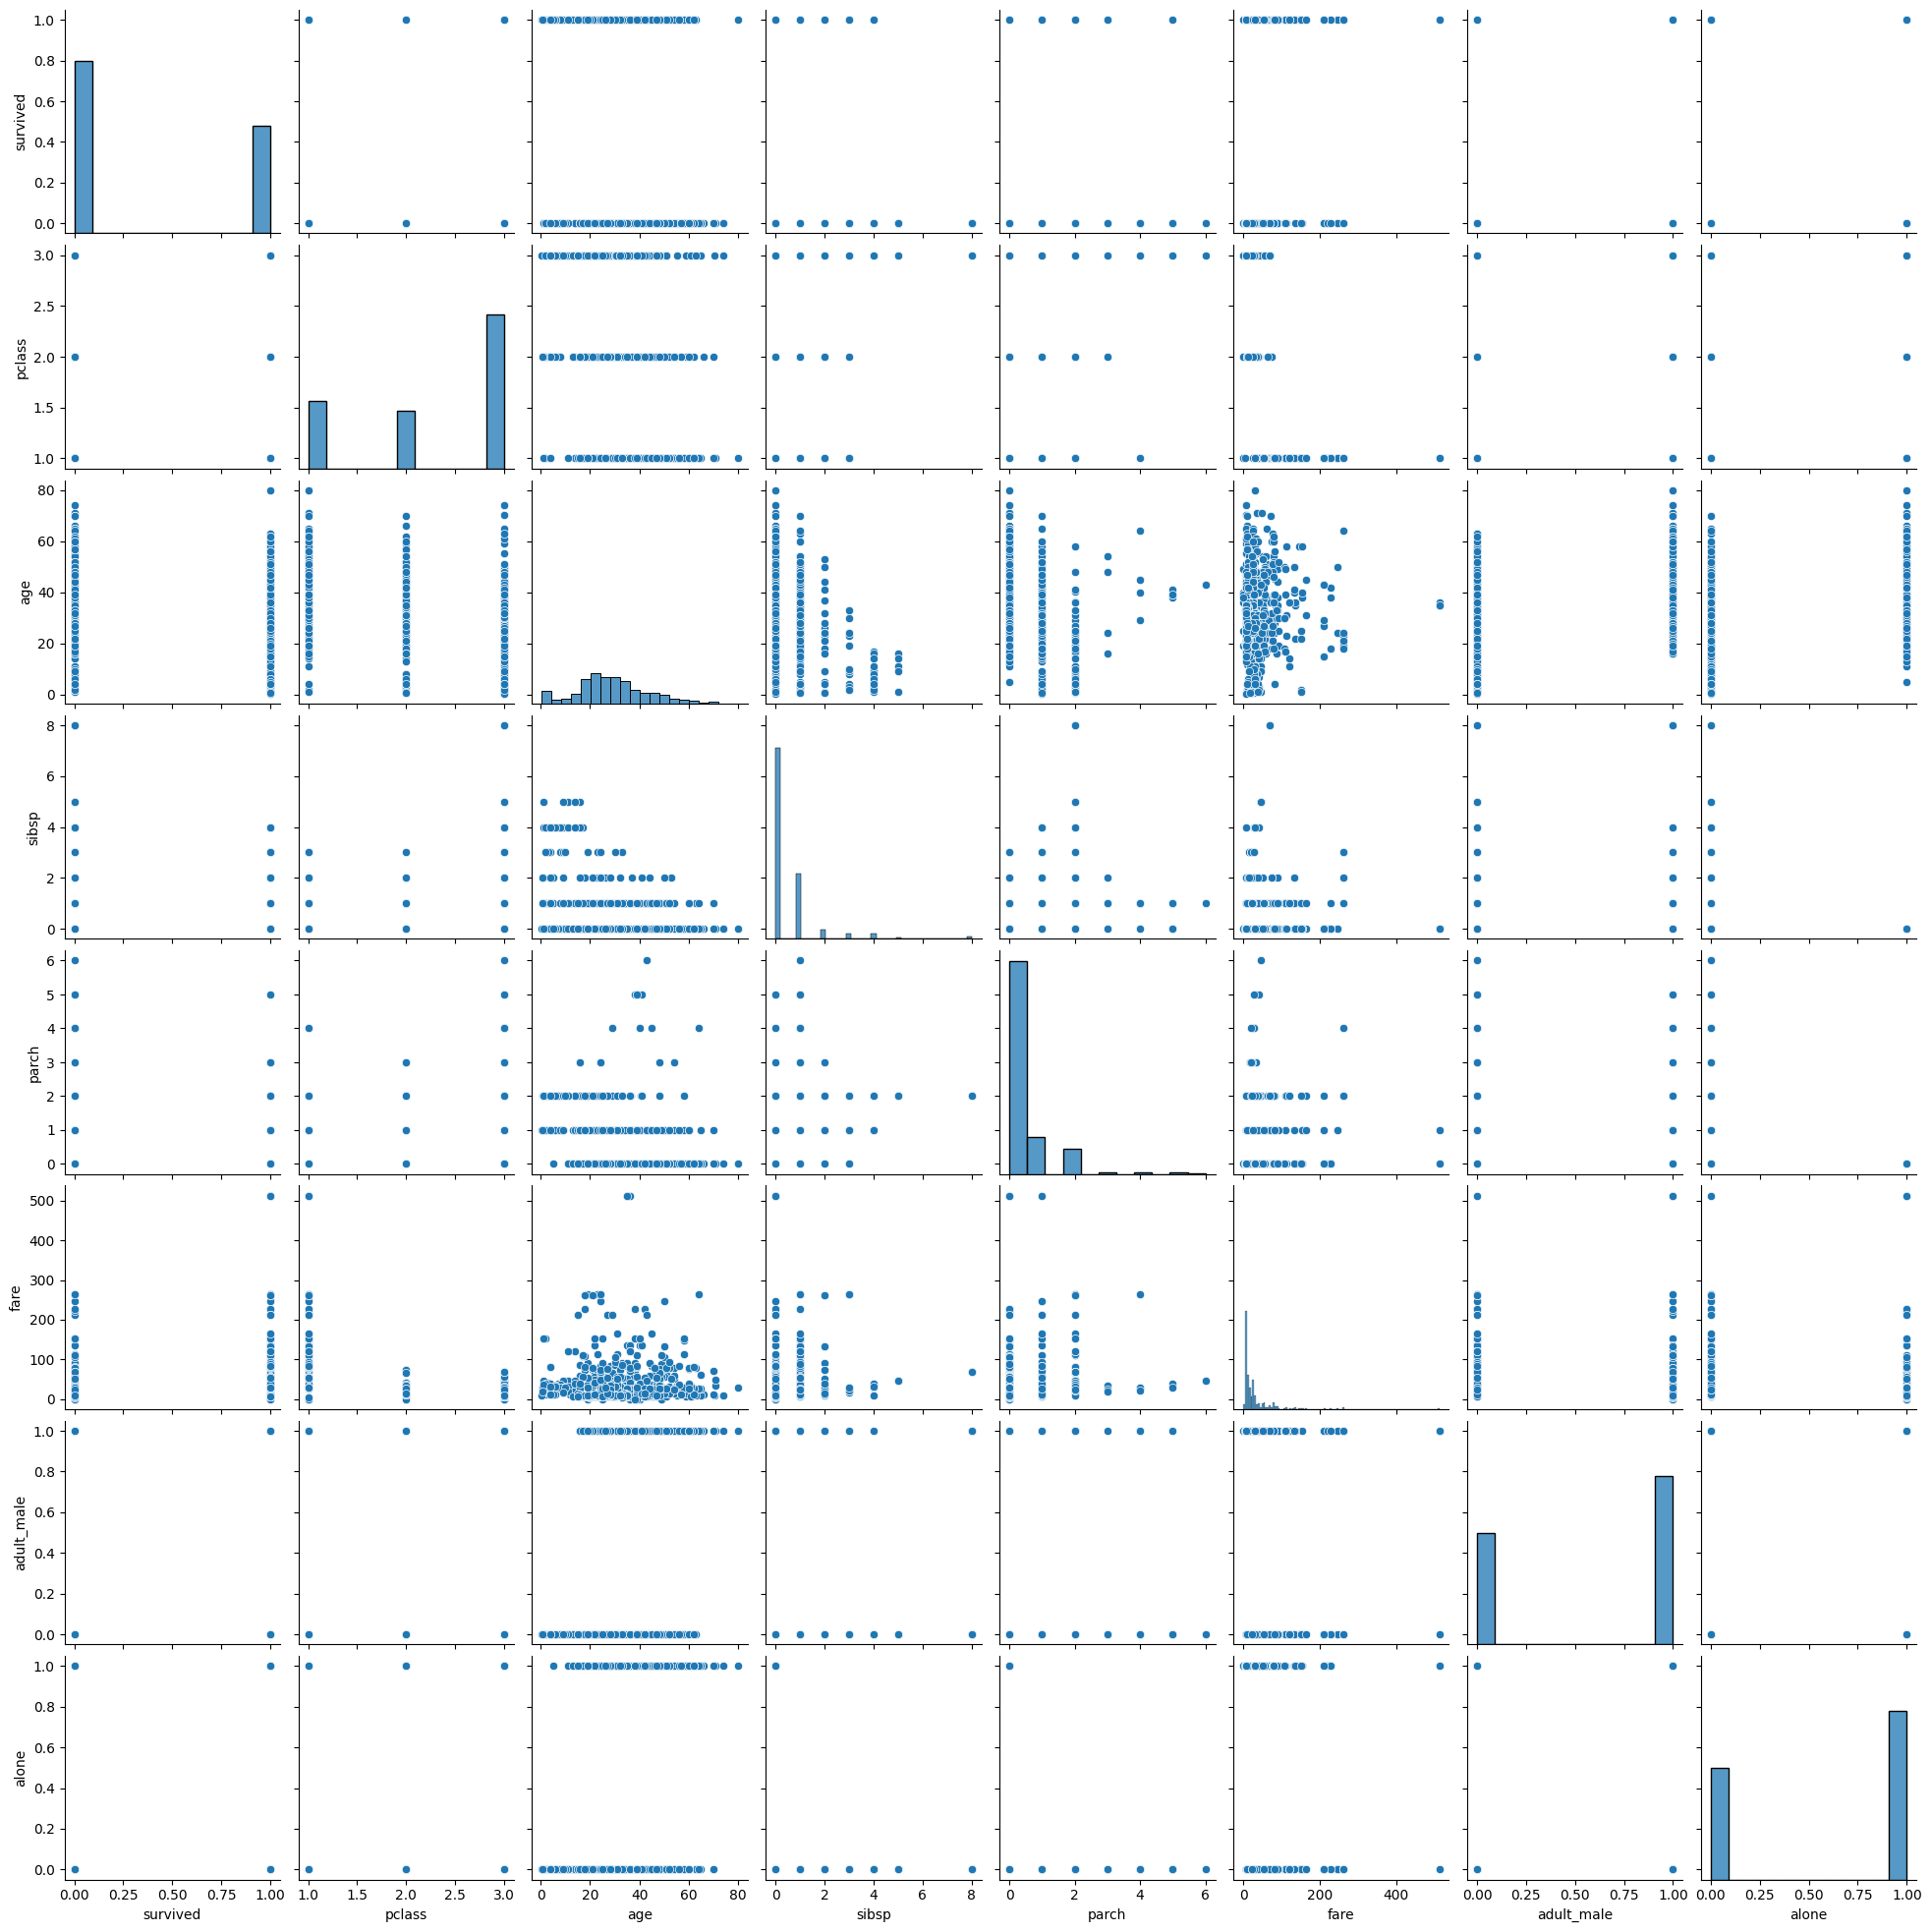

In [ ]:
# so lets plot all numerics versus each other
sns.pairplot(titanic);

In [ ]:
# in our Titanic case our pairplots did not produce any significant new insights
# we had many numerics with few discrete values ( in effect categories hiding as numbers)


## 📝 Exercise (30–45 min)

Using the Titanic dataset, complete the following tasks:

1. Compute survival rates by **embark_town** and **class**.  
2. Plot the age distribution for survivors vs non-survivors using **histograms** or **density plots**.  
3. Detect outliers in **age** using the IQR method and comment on findings.  
4. Create a new feature `family_size = sibsp + parch + 1`. Analyze its relationship with survival.  
5. Use a **pivot table** to display survival rates by **sex** and **class**. What patterns do you see?  
6. (Optional, for advanced) Perform a **chi-square test** on survival vs sex to test independence.  

### Fun - Plot the Dinosaurus Dozen

Hint: Use Gemini code generate (or other LLM tool), it should provide an easy seaborn based recipe to plot your own Dinosaurus dozen


In [ ]:
# let's calculate survival by embark_town and class and also counts
survivors_by_town_class = df.groupby(['embark_town', 'class'], observed=False)['survived'].agg(['mean','count']) # we save our results of split-apply-combine into new dataframe that we call survivors_by_town_class
survivors_by_town_class

mean  count
embark_town class                  
Cherbourg   First   0.694118     85
            Second  0.529412     17
            Third   0.378788     66
Queenstown  First   0.500000      2
            Second  0.666667      3
            Third   0.375000     72
Southampton First   0.582677    127
            Second  0.463415    164
            Third   0.189802    353

In [ ]:
# let's crate a pivot table with index being embark_town, columns being class and values being mean of survived
pivot_table = pd.pivot_table(df, values='survived', index='embark_town', columns='class', aggfunc='mean')
display(pivot_table) # to display more than one DataFrame in same cell we use display for the earlier ones
pivot_table = pd.pivot_table(df, values='survived', index='embark_town', columns='class', aggfunc='count')
pivot_table

/tmp/ipython-input-4293161980.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(df, values='survived', index='embark_town', columns='class', aggfunc='mean')


class,First,Second,Third
embark_town,,,
Cherbourg,0.694118,0.529412,0.378788
Queenstown,0.500000,0.666667,0.375000
Southampton,0.582677,0.463415,0.189802


/tmp/ipython-input-4293161980.py:4: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(df, values='survived', index='embark_town', columns='class', aggfunc='count')


class,First,Second,Third
embark_town,,,
Cherbourg,85,17,66
Queenstown,2,3,72
Southampton,127,164,353


In [ ]:
# let's calculate survival by embark_town and class and sex
survivors_by_town_class_sex = df.groupby(['embark_town', 'class', 'sex'], observed=False)['survived'].agg(['mean','count'])
survivors_by_town_class_sex


mean  count
embark_town class  sex                    
Cherbourg   First  female  0.976744     43
                   male    0.404762     42
            Second female  1.000000      7
                   male    0.200000     10
            Third  female  0.652174     23
                   male    0.232558     43
Queenstown  First  female  1.000000      1
                   male    0.000000      1
            Second female  1.000000      2
                   male    0.000000      1
            Third  female  0.727273     33
                   male    0.076923     39
Southampton First  female  0.958333     48
                   male    0.354430     79
            Second female  0.910448     67
                   male    0.154639     97
            Third  female  0.375000     88
                   male    0.128302    265

### Early conclusion and room for further research

We see that Third class survival was markedly different for Cherbourg and Queenstown versus Southampton.

What could explain this?

Is it caused by Southampton 3rd class taking worse seats? - TODO Research This

In [ ]:
# lets add percentage survival column to our survival_by_town_count
survivors_by_town_class['survival_percentage'] = survivors_by_town_class['mean'] * 100
survivors_by_town_class

mean  count  survival_percentage
embark_town class                                       
Cherbourg   First   0.694118     85            69.411765
            Second  0.529412     17            52.941176
            Third   0.378788     66            37.878788
Queenstown  First   0.500000      2            50.000000
            Second  0.666667      3            66.666667
            Third   0.375000     72            37.500000
Southampton First   0.582677    127            58.267717
            Second  0.463415    164            46.341463
            Third   0.189802    353            18.980170

In [ ]:
# let's round survival_percentage to two digits after comma
survivors_by_town_class['survival_percentage'] = survivors_by_town_class['survival_percentage'].round(2) # here we have lost the data in survival_percentage column, we only have up to 2 digits after comma(point in English)
survivors_by_town_class

mean  count  survival_percentage
embark_town class                                       
Cherbourg   First   0.694118     85                69.41
            Second  0.529412     17                52.94
            Third   0.378788     66                37.88
Queenstown  First   0.500000      2                50.00
            Second  0.666667      3                66.67
            Third   0.375000     72                37.50
Southampton First   0.582677    127                58.27
            Second  0.463415    164                46.34
            Third   0.189802    353                18.98

In [ ]:
# Pandas also offers option to display specific number of digits while still preserving the actual number of floating point precision
# command is something like pd.set_options
pd.options.display.float_format = '{:.2f}'.format
survivors_by_town_class

mean  count  survival_percentage
embark_town class                                   
Cherbourg   First   0.69     85                69.41
            Second  0.53     17                52.94
            Third   0.38     66                37.88
Queenstown  First   0.50      2                50.00
            Second  0.67      3                66.67
            Third   0.38     72                37.50
Southampton First   0.58    127                58.27
            Second  0.46    164                46.34
            Third   0.19    353                18.98

In [ ]:
# key difference is that float_format simply is for display formatting without data loss of precision
# while round(2) actually lost us some precision.

In [ ]:
# let's save this on Colab
survivors_by_town_class.to_excel('survivors_by_town_class.xlsx')

In [ ]:
# now download from colab to our computer
from google.colab import files
files.download('survivors_by_town_class.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# let's save csv in colab
survivors_by_town_class.to_csv('survivors_by_town_class.csv')

### Plot the age distribution for survivors vs non-survivors using histograms or density plots.

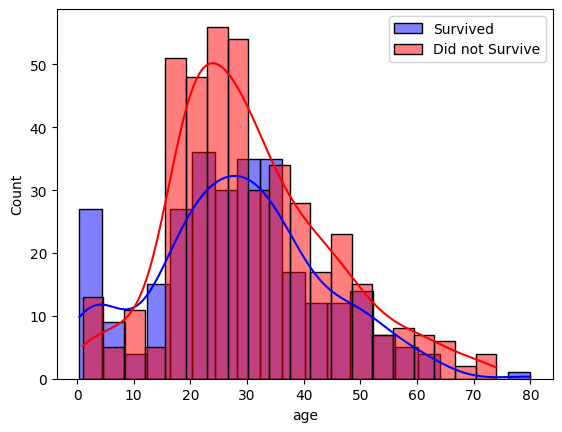

In [ ]:
# Plot the age distribution for survivors vs non-survivors using histograms AND density plots.
sns.histplot(titanic[titanic['survived'] == 1]['age'].dropna(), bins=20, kde=True, color='blue', label='Survived')
sns.histplot(titanic[titanic['survived'] == 0]['age'].dropna(), bins=20, kde=True, color='red', label='Did not Survive')
# show labels
plt.legend()
# we can also save the image to storage (png, pdf, svg, and other formats are available)
# we use matplotlib directly (because Seaborn is wrapper around matplotlib)
plt.savefig('age_distribution.png')
# documentation on savefig  https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html

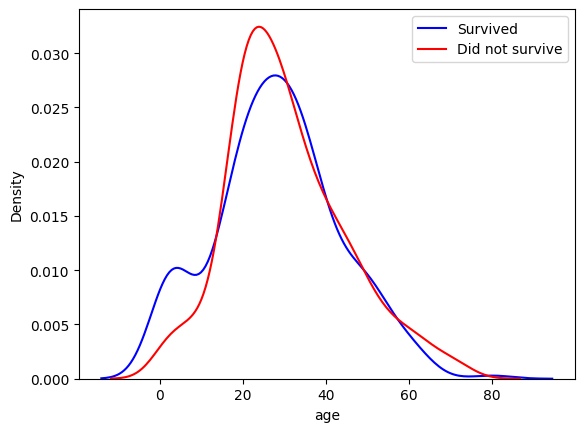

In [ ]:
# let's just plot kde plots only for both survivors in blue and non survivors in red.
sns.kdeplot(titanic[titanic['survived'] == 1]['age'].dropna(), color='blue', label='Survived')
sns.kdeplot(titanic[titanic['survived'] == 0]['age'].dropna(), color='red', label='Did not survive')
# show labels
plt.legend()


<Axes: xlabel='age', ylabel='survived'>

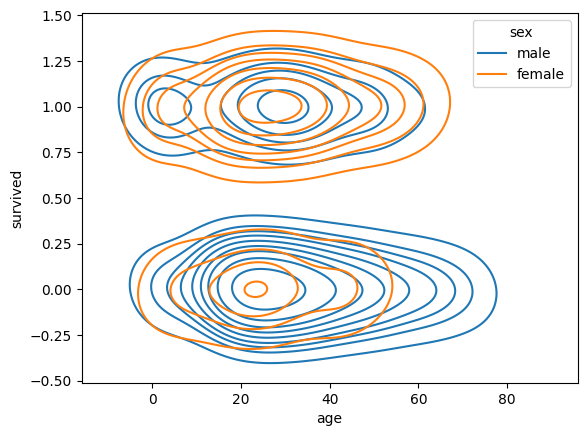

In [ ]:
# let's plot KDE plots for survived column by age and sex so this means four plots
sns.kdeplot(data=titanic, x='age', y='survived', hue='sex')

### Detect outliers in age using the IQR method

In [ ]:
# Detect outliers in age using the IQR method
Q1 = titanic['age'].quantile(0.25)
Q3 = titanic['age'].quantile(0.75)
print(f"Q1 {Q1}")
print(f"Q3 {Q3}")
IQR = Q3 - Q1
outliers = titanic[(titanic['age'] < Q1 - 1.5*IQR) | (titanic['age'] > Q3 + 1.5*IQR)] # | in filter works like OR
# just like & is for AND in filters
print("Outliers count:", len(outliers))

Q1 20.125
Q3 38.0
Outliers count: 11


In [ ]:
# so let's check how many passangers are total
# and how many passangers are between Q1 and Q3 (we expect roughly half)
print("Total count:", len(titanic))
print("Count between Q1 and Q3:", len(titanic[(titanic['age'] >= Q1) & (titanic['age'] <= Q3)]))

# TODO why is it not exactly half?

Total count: 891
Count between Q1 and Q3: 358


In [ ]:
# so we looked for Q1 - 1.5*IQR
print(f"We filtered for values either less than {Q1 - 1.5*IQR}")
# or we looked for Q3 + 1.5*IQR
print(f"We filtered for values either greater than {Q3 + 1.5*IQR}")

We filtered for values either less than -6.6875
We filtered for values either greater than 64.8125


In [ ]:
# so we can manually check for this value of older age 64.8125
older_folks = titanic[titanic['age'] > 64.8125]
# shape of older folks
print(f"Shape of older folks: {older_folks.shape}")
# older_folks.sort_values(by='age', ascending=False)
# let's sort by age in ascending and pclass in descending
older_folks.sort_values(by=['age', 'pclass','fare'], ascending=[True, False,False]) # if I wanted older_folks modified I would add inplace=True parameter
# this means we sort by age first in ascending
# any tiebreaks are resolved by sorting those in descending order by pclass
# you can have as mnay sort_value columns as you want
# finally if we still have tiebreaks
# we sort those by fare in descending order
# if we wanted wanted to save this sorted dataframe
# we could simply overwrite previous one by
# older_folks = older_folks.sort_values(by=['age', 'pclass','fare'], ascending=[True, False,False])
# or I could create a copy
# older_folks_sorted = older_folks.sort_values(by=['age', 'pclass','fare'], ascending=[True, False,False]).copy()

Shape of older folks: (11, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
280,0,3,male,65.00,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True
54,0,1,male,65.00,0,1,61.98,C,First,man,True,B,Cherbourg,no,False
456,0,1,male,65.00,0,0,26.55,S,First,man,True,E,Southampton,no,True
33,0,2,male,66.00,0,0,10.50,S,Second,man,True,NaN,Southampton,no,True
672,0,2,male,70.00,0,0,10.50,S,Second,man,True,NaN,Southampton,no,True
745,0,1,male,70.00,1,1,71.00,S,First,man,True,B,Southampton,no,False
116,0,3,male,70.50,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True
493,0,1,male,71.00,0,0,49.50,C,First,man,True,NaN,Cherbourg,no,True
96,0,1,male,71.00,0,0,34.65,C,First,man,True,A,Cherbourg,no,True
851,0,3,male,74.00,0,0,7.78,S,Third,man,True,NaN,Southampton,no,True


### Create a new feature family_size = sibsp + parch + 1. Analyze its relationship with survival.

In [ ]:
# Create a new feature family_size = sibsp + parch + 1.
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1 # so 1 represents yourself
# of course this means about the ship family size, not what you left behind
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,family_size
0,0,3,male,22.00,1,0,7.25,S,Third,man,True,NaN,Southampton,no,False,2
1,1,1,female,38.00,1,0,71.28,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.00,0,0,7.92,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.00,1,0,53.10,S,First,woman,False,C,Southampton,yes,False,2
4,0,3,male,35.00,0,0,8.05,S,Third,man,True,NaN,Southampton,no,True,1


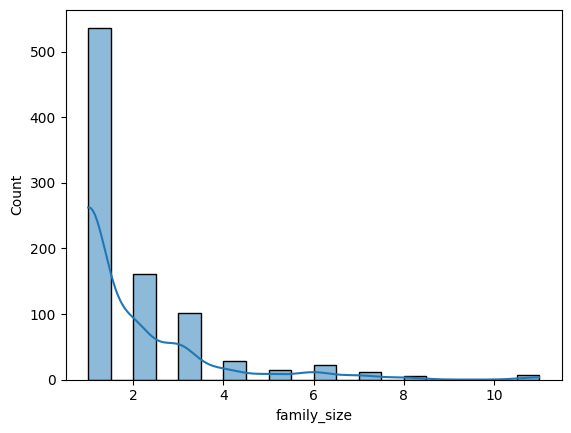

In [ ]:
# let's see histogram of family_size
sns.histplot(titanic['family_size'], bins=20, kde=True);

In [ ]:
# we could also check value counts
titanic['family_size'].value_counts()

,count
family_size,
1,537
2,161
3,102
4,29
6,22
5,15
7,12
11,7
8,6


In [ ]:
# let's order family_size value counts by family_size
titanic['family_size'].value_counts().sort_index()

,count
family_size,
1,537
2,161
3,102
4,29
5,15
6,22
7,12
8,6
11,7


In [ ]:
#  Analyze family size relationship with survival.
titanic.groupby('family_size')['survived'].mean() # if I only have one aggregation function I can call it immediately

,survived
family_size,
1,0.30
2,0.55
3,0.58
4,0.72
5,0.20
6,0.14
7,0.33
8,0.00
11,0.00


In [ ]:
# let's group by family_size and calculate mean survived and also count
titanic.groupby('family_size')['survived'].agg(['mean','count']) #if I have more than one aggregation function I put them inside agg()

,mean,count
family_size,,
1,0.30,537
2,0.55,161
3,0.58,102
4,0.72,29
5,0.20,15
6,0.14,22
7,0.33,12
8,0.00,6
11,0.00,7


In [ ]:
# so first conclusions
# loners had bad survival over small family units
# truly large families perished but those were only few data points - not really enough to draw conclusions

### Use a pivot table to display survival rates by sex and class. What patterns do you see?*italicized text*

In [ ]:
# Use a pivot table to display survival rates by sex and class.
pivot_gender_class = pd.pivot_table(titanic, values='survived', index='sex', columns='class', aggfunc='mean')
pivot_gender_class

/tmp/ipython-input-4096125812.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_gender_class = pd.pivot_table(titanic, values='survived', index='sex', columns='class', aggfunc='mean')


class,First,Second,Third
sex,,,
female,0.97,0.92,0.50
male,0.37,0.16,0.14


In [ ]:
# let's multiply ALL cells by 100
pivot_gender_class = pivot_gender_class * 100
# round to 2 digits after comma
pivot_gender_class = pivot_gender_class.round(2) # applies to ALL cells
pivot_gender_class

class,First,Second,Third
sex,,,
female,96.81,92.11,50.00
male,36.89,15.74,13.54


In [ ]:
# so again first and second class female passangers had exceptional survival rations
# we can save this table as well
pivot_gender_class.to_excel('pivot_gender_class.xlsx')

### Perform a chi-square test on survival vs sex to test independence.

In [ ]:
# Perform a chi-square test on survival vs sex to test independence.
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(titanic['sex'], titanic['survived'])
contingency_table

survived,0,1
sex,,
female,81,233
male,468,109


In [ ]:

# Perform Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-squared: {chi2}, p-value: {p}")
# Interpret results
if p < 0.05:
    print("Significant association between sex and survival.")
else:
    print("No significant association between sex and survival.")

Chi-squared: 260.71702016732104, p-value: 1.1973570627755645e-58
Significant association between sex and survival.


## Plotting Datasaurus Dozen

In [ ]:
# let's get list of available datasets
datasets_list = sns.get_dataset_names()
datasets_list
# from https://seaborn.pydata.org/generated/seaborn.get_dataset_names.html#seaborn.get_dataset_names

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [ ]:
# TODO find
# let's first import Dinosaurus Dozen data from sns
# so challenge is to find an url which stores the dataset
# then we could use Day 2 downloader example to download the data directly
# if we have csv we could use pd.read_csv
# if we hav xlsx we could pd.read_excel
# if we have zip we would have to download (with code or hand) and unzip (with code or hand)
# thanks Normunds for
# https://medium.com/@marc.bolle/datasaurus-dozen-visualization-using-python-d328dad64d20 see here
tsv_url = "https://raw.githubusercontent.com/jumpingrivers/datasauRus/main/inst/extdata/DatasaurusDozen-Long.tsv"
# let's load this tsv
df_dino = pd.read_csv(tsv_url, sep='\t')
df_dino.head()


,dataset,x,y
0,dino,55.38,97.18
1,dino,51.54,96.03
2,dino,46.15,94.49
3,dino,42.82,91.41
4,dino,40.77,88.33


In [ ]:
# let's see the value counts for dataset
df_dino['dataset'].value_counts()

,count
dataset,
dino,142
away,142
h_lines,142
v_lines,142
x_shape,142
star,142
high_lines,142
dots,142
circle,142


Text(0.5, 0.98, 'Datazaurus Dozen')

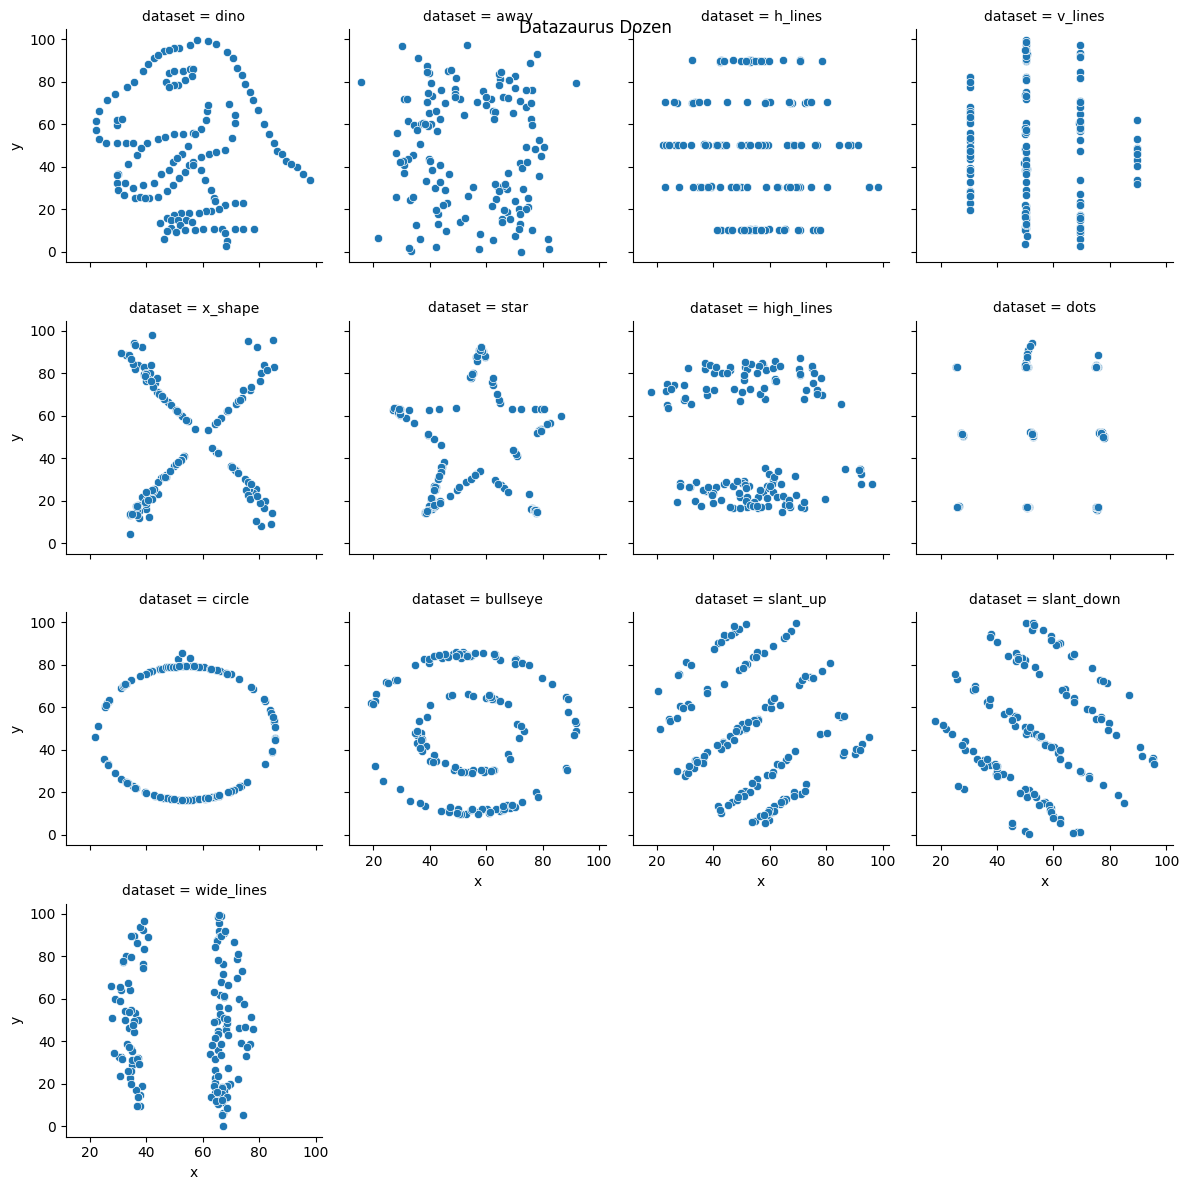

In [ ]:
# so lets plost all the dinos using scatterplot
# we can use Seaborn FacetGrid
# we want 4 column grid
g = sns.FacetGrid(df_dino, col="dataset", col_wrap=4)
g.map(sns.scatterplot, "x", "y")
# let's add title "Datazaurus Dozen"
g.fig.suptitle("Datazaurus Dozen") # we could have moved this up a bit


In [ ]:
# lets group by dataset and describe the groups
df_dino.groupby('dataset').describe()

x                                                y        \
            count  mean   std   min   25%   50%   75%   max  count  mean   
dataset                                                                    
away       142.00 54.27 16.77 15.56 39.72 53.34 69.15 91.64 142.00 47.83   
bullseye   142.00 54.27 16.77 19.29 41.63 53.84 64.80 91.74 142.00 47.83   
circle     142.00 54.27 16.76 21.86 43.38 54.02 64.97 85.66 142.00 47.84   
dino       142.00 54.26 16.77 22.31 44.10 53.33 64.74 98.21 142.00 47.83   
dots       142.00 54.26 16.77 25.44 50.36 50.98 75.20 77.95 142.00 47.84   
h_lines    142.00 54.26 16.77 22.00 42.29 53.07 66.77 98.29 142.00 47.83   
high_lines 142.00 54.27 16.77 17.89 41.54 54.17 63.95 96.08 142.00 47.84   
slant_down 142.00 54.27 16.77 18.11 42.89 53.14 64.47 95.59 142.00 47.84   
slant_up   142.00 54.27 16.77 20.21 42.81 54.26 64.49 95.26 142.00 47.83   
star       142.00 54.27 16.77 27.02 41.03 56.53 68.71 86.44 142.00 47.84   
v_lines    142.00 54.27 16.77 30.45 49.96 50.36 69.50 89.50 142.00 47.84   
wide_lines 142.00 54.27 16.77 27.44 35.52 64.55 67.45 77.92 142.00 47.83   
x_shape    142.00 54.26 16.77 31.11 40.09 47.14 71.86 85.45 142.00 47.84   

                                                
             std   min   25%   50%   75%   max  
dataset                                         
away       26.94  0.02 24.63 47.54 71.80 97.48  
bullseye   26.94  9.69 26.24 47.38 72.53 85.88  
circle     26.93 16.33 18.35 51.03 77.78 85.58  
dino       26.94  2.95 25.29 46.03 68.53 99.49  
dots       26.93 15.77 17.11 51.30 82.88 94.25  
h_lines    26.94 10.46 30.48 50.47 70.35 90.46  
high_lines 26.94 14.91 22.92 32.50 75.94 87.15  
slant_down 26.94  0.30 27.84 46.40 68.44 99.64  
slant_up   26.94  5.65 24.76 45.29 70.86 99.58  
star       26.93 14.37 20.37 50.11 63.55 92.21  
v_lines    26.94  2.73 22.75 47.11 65.85 99.69  
wide_lines 26.94  0.22 24.35 46.28 67.57 99.28  
x_shape    26.93  4.58 23.47 39.88 73.61 97.84

In [ ]:
# let's split the df_dino into multiple dataframes bases on dataset column
# first let's get unique values in dataset
unique_datasets = df_dino['dataset'].unique()
unique_datasets


array(['dino', 'away', 'h_lines', 'v_lines', 'x_shape', 'star',
       'high_lines', 'dots', 'circle', 'bullseye', 'slant_up',
       'slant_down', 'wide_lines'], dtype=object)

In [ ]:
# let us import tqdm for progress bar - just cosmetics
from tqdm import tqdm # this is external library for progress bar

In [ ]:
# so let's go through unique_dataset values one by one and create new dataframe filtered by that unique_dataset value and save it in excel with that particular dataset name
for dataset_value in tqdm(unique_datasets):
  print(f"Filtering dataset for {dataset_value}")
  my_df = df_dino[df_dino['dataset'] == dataset_value] # so I made a temporary dataframe and then save it
  my_df.to_excel(f"{dataset_value}.xlsx")

 38%|███▊      | 5/13 [00:00<00:00, 43.81it/s]

Filtering dataset for dino
Filtering dataset for away
Filtering dataset for h_lines
Filtering dataset for v_lines
Filtering dataset for x_shape
Filtering dataset for star
Filtering dataset for high_lines
Filtering dataset for dots
Filtering dataset for circle


100%|██████████| 13/13 [00:00<00:00, 40.47it/s]

Filtering dataset for bullseye
Filtering dataset for slant_up
Filtering dataset for slant_down
Filtering dataset for wide_lines


In [ ]:
# let us get list of all excel files in current folder using Path
from pathlib import Path
file_list = sorted(Path('.').glob('*.xlsx')) # again . means current folder and glob matches only that folder - for deeper folders we use rglob
file_list

[PosixPath('away.xlsx'),
 PosixPath('bullseye.xlsx'),
 PosixPath('circle.xlsx'),
 PosixPath('dino.xlsx'),
 PosixPath('dots.xlsx'),
 PosixPath('grouped_by_class_and_sex.xlsx'),
 PosixPath('h_lines.xlsx'),
 PosixPath('high_lines.xlsx'),
 PosixPath('pivot_gender_class.xlsx'),
 PosixPath('slant_down.xlsx'),
 PosixPath('slant_up.xlsx'),
 PosixPath('star.xlsx'),
 PosixPath('v_lines.xlsx'),
 PosixPath('wide_lines.xlsx'),
 PosixPath('x_shape.xlsx')]

In [ ]:
# so let's filter our file_list for only those files that contain any text from unique_datasets
file_list_filtered = [file for file in file_list if any(dataset_value in file.name for dataset_value in unique_datasets)]
file_list_filtered

[PosixPath('away.xlsx'),
 PosixPath('bullseye.xlsx'),
 PosixPath('circle.xlsx'),
 PosixPath('dino.xlsx'),
 PosixPath('dots.xlsx'),
 PosixPath('h_lines.xlsx'),
 PosixPath('high_lines.xlsx'),
 PosixPath('slant_down.xlsx'),
 PosixPath('slant_up.xlsx'),
 PosixPath('star.xlsx'),
 PosixPath('v_lines.xlsx'),
 PosixPath('wide_lines.xlsx'),
 PosixPath('x_shape.xlsx')]

In [ ]:
# now we can download all files in file_list_filtered
for file in tqdm(file_list_filtered):
  files.download(file)

  0%|          | 0/13 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

100%|██████████| 13/13 [00:00<00:00, 339.91it/s]



## 🔄 Reflection

- What surprised you most about Titanic passenger survival patterns?  
- How do categorical vs numerical features require different EDA approaches?  
- How could EDA guide the next steps in modeling or prediction?  



## 📚 Additional Sources for Further EDA Work

- Wes McKinney, *Python for Data Analysis*  
- Jake VanderPlas, *Python Data Science Handbook*  
- YData Profiling: [https://ydata-profiling.ydata.ai](https://ydata-profiling.ydata.ai)  
- Seaborn Documentation: [https://seaborn.pydata.org](https://seaborn.pydata.org)  
